In [4]:
import pickle
import numpy as np
import Orange
from sklearn.linear_model import LogisticRegression
with open('risco_credito.pkl', 'rb') as f:
    x_risco_credito, y_risco_credito = pickle.load(f)

In [5]:
x_risco_credito, y_risco_credito

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [6]:
x_risco_credito = np.delete(x_risco_credito, [2,7, 11], axis=0)
y_risco_credito = np.delete(y_risco_credito, [2,7, 11], axis=0)

In [7]:
x_risco_credito, y_risco_credito

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
        'alto', 'baixo', 'alto'], dtype=object))

In [8]:
logistic_risco_credit.intercept_

NameError: name 'logistic_risco_credit' is not defined

In [ ]:
logistic_risco_credit.coef_

In [9]:
previsoes1 = logistic_risco_credit.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes1

NameError: name 'logistic_risco_credit' is not defined

In [14]:
with open('census.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [15]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(x_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [16]:
logistic_credit.intercept_

array([-2.10474165])

In [17]:
logistic_credit.coef_

array([[-6.94469649e-02,  1.18679159e-01, -9.04524758e-03,
        -7.81357460e-02,  5.76691457e-02,  5.08994420e-02,
        -8.82856549e-02, -5.01462809e-02, -1.42900810e-01,
        -1.04784027e-01, -1.19233556e-01, -3.77074867e-02,
        -2.08124820e-02, -2.93974652e-02, -8.45705964e-02,
        -8.08920718e-02, -8.16248852e-03,  1.09035256e-02,
         1.46893853e-01,  1.20194939e-01, -7.84325002e-02,
         1.45553932e-01, -4.75278833e-01,  1.14436730e-01,
         2.27948173e-02, -1.93347518e-01,  4.38094226e-02,
         7.07825942e-01, -6.57034078e-02, -5.23341515e-01,
        -1.09247966e-01, -8.94357349e-02, -7.42801130e-02,
        -1.40912231e-02, -2.06468670e-02,  2.21547856e-02,
         2.51784840e-01, -1.68183468e-01, -1.43046856e-01,
        -8.47285978e-02, -2.55735605e-01, -2.68986405e-01,
         1.61655356e-01,  8.57817041e-02,  8.33259769e-02,
         1.08967512e-01, -2.56717036e-02, -2.99250092e-02,
         1.37854640e-01, -8.45026445e-02, -3.08580420e-0

In [18]:
previsoes = logistic_credit.predict(x_credit_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [19]:
y_credit_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [20]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.849539406345957

0.849539406345957

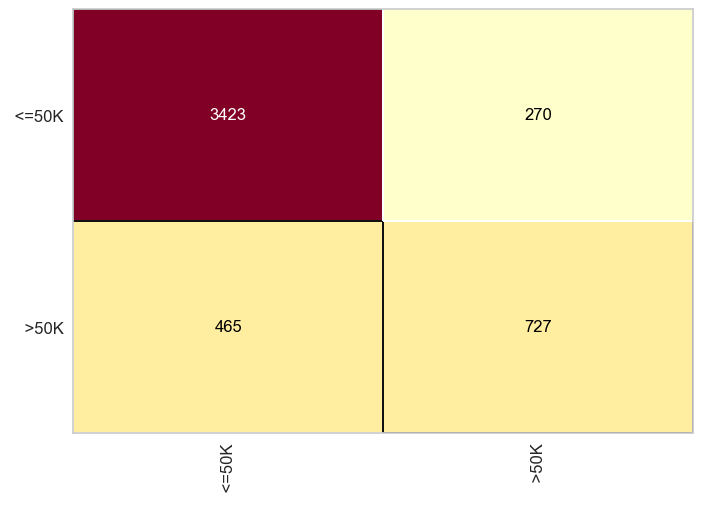

In [22]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [23]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

